In [ ]:
#import thư viện
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt 
from keras.backend import dropout
from keras.callbacks import EarlyStopping



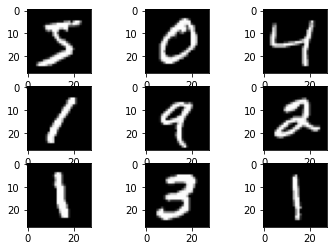

In [ ]:
# Chia tập dữ liệu thành 2 bộ train và test
from keras.datasets import mnist
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = mnist.load_data()
for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))       
plt.show()


In [ ]:
#Chuyển chiều của x từ 3 chiều về 2 chiều
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)



In [ ]:
#Tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#translate model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
y_pred= model.predict(x_test)
print(y_pred.flatten)
print(y_test)


<built-in method flatten of numpy.ndarray object at 0x7f9ac60a1870>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Chạy model với số lần học là 500 và độ kiên nhẫn là 100
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])


Epoch 1/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.2103 - val_accuracy: 0.9793
Epoch 2/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.2111 - val_accuracy: 0.9808
Epoch 3/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.2438 - val_accuracy: 0.9783
Epoch 4/500
375/375 [==============================] - 8s 20ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.2293 - val_accuracy: 0.9809
Epoch 5/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.2051 - val_accuracy: 0.9817
Epoch 6/500
375/375 [==============================] - 8s 21ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.2145 - val_accuracy: 0.9818
Epoch 7/500
375/375 [==============================] - 8s 20ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.2588 - val_accuracy:

In [ ]:
y_pred= model.predict(x_test)
print(y_pred.flatten)
print(y_test)


<built-in method flatten of numpy.ndarray object at 0x7f9ac5d93ed0>
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Danh gia do chinh xac
score = model.evaluate(x_test,y_test,verbose=0)
print('Test_loss :',score[0])
print('Test accuracy : ',score[1])


Test_loss : 0.2566152513027191
Test accuracy :  0.9819999933242798


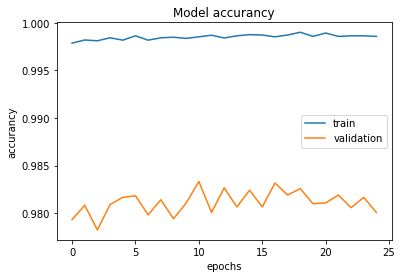

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history. history['val_accuracy'])
plt.title('Model accurancy')
plt.ylabel('accurancy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()
